In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style='whitegrid')
%matplotlib inline


In [5]:
print(os.getcwd())

c:\Users\Dre Sistena\Desktop\Projects\ev-vs-hybrid-vs-gas-capstone\epa-capstone\notebooks


In [6]:
os.chdir("C:/Users/Dre Sistena/Desktop/Projects/ev-vs-hybrid-vs-gas-capstone/epa-capstone")


In [7]:
xls = pd.ExcelFile(r"C:\Users\Dre Sistena\Desktop\Projects\ev-vs-hybrid-vs-gas-capstone\epa-capstone\data\EPA-By-Year\combined_vehicle_data.xls")
print(xls.sheet_names)

# Example loading
df_gas_hybrid = pd.read_excel(xls, sheet_name='Cars')
df_ev = pd.read_excel(xls, sheet_name='EV Cars')

['Cars', 'EV Cars']


In [8]:
df_energy = pd.read_csv("../epa-capstone/data/electricity_cost_dataset.csv")
df_gas = pd.read_excel("../epa-capstone/data/gas_prices_by_year.xlsx", skiprows=2)
df_fuel = pd.read_excel("../epa-capstone/data/petroleum_production_consumption.xlsx", skiprows=2)


In [9]:
df_gas = df_gas.loc[:, ~df_gas.columns.str.contains('^Unnamed')]
df_fuel = df_fuel.loc[:, ~df_fuel.columns.str.contains('^Unnamed')]

In [10]:
df_energy.rename(columns={'air qality index': 'air quality index'}, inplace=True)
df_energy = df_energy[['structure type', 'electricity cost', 'water consumption', 'air quality index']]

In [11]:
df_fuel.head()

,Year,Consumption,Production,Net Imports
0,1949,5.763038,5.476784,0.318310
1,1950,6.457918,5.905575,0.545082
2,1951,7.016132,6.719082,0.422307
3,1952,7.269617,6.867079,0.519997
4,1953,7.599627,7.111400,0.632625


In [12]:
df_gas.head()

,Year,Gasoline Price ($/gallon),Inflation Adjuster,Gasoline Price (2023 $/gallon)
0,1950,0.268,12.28,3.29104
1,1951,0.272,11.59,3.15248
2,1952,0.274,11.50,3.15100
3,1953,0.287,11.41,3.27467
4,1954,0.290,11.50,3.33500


In [13]:
df_energy.head()

,structure type,electricity cost,water consumption,air quality index
0,Mixed-use,1420.0,2519.0,188
1,Mixed-use,3298.0,2324.0,165
2,Mixed-use,3115.0,2701.0,198
3,Residential,1575.0,1000.0,74
4,Residential,4301.0,5990.0,32


In [14]:
df_energy.columns = df_energy.columns.str.strip()

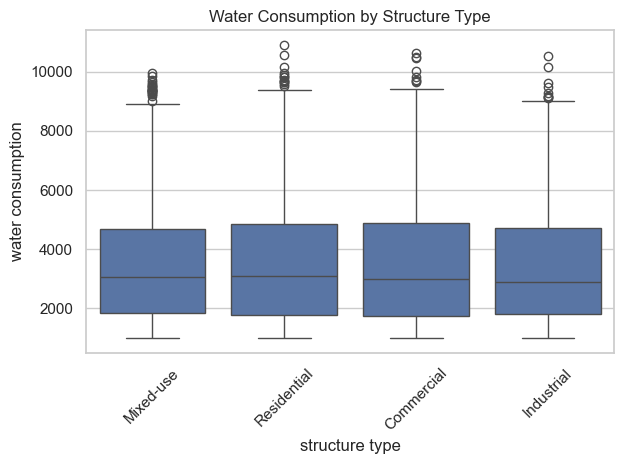

In [15]:
sns.boxplot(x='structure type', y='water consumption', data=df_energy)
plt.title('Water Consumption by Structure Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
print(df_fuel.columns.tolist())
print(df_energy.columns.tolist())
print(df_gas.columns.tolist())

['Year', 'Consumption', 'Production', 'Net Imports']
['structure type', 'electricity cost', 'water consumption', 'air quality index']
['Year', 'Gasoline Price ($/gallon)', 'Inflation Adjuster', 'Gasoline Price (2023 $/gallon)']


In [17]:
for df in [df_fuel, df_energy, df_gas]:
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

C:\Users\Dre Sistena\AppData\Local\Temp\ipykernel_6336\4288507486.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Fuel Type')


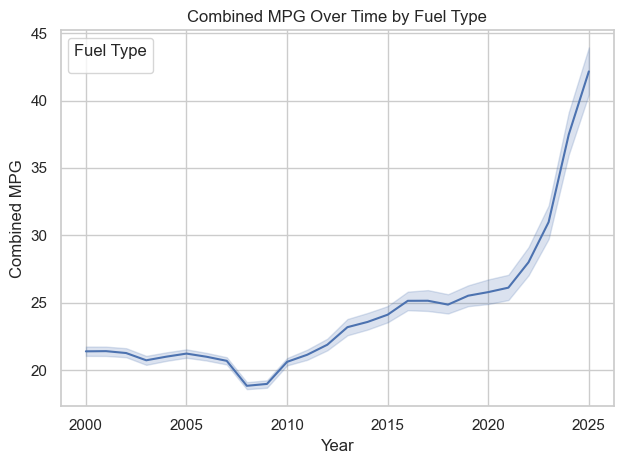

In [19]:
sns.lineplot(data=df_gas_hybrid, x='Year', y='cmb')
plt.title('Combined MPG Over Time by Fuel Type')
plt.ylabel('Combined MPG')
plt.xlabel('Year')
plt.legend(title='Fuel Type')
plt.tight_layout()
plt.show()


In [20]:
df_fuel.columns = df_fuel.columns.str.strip().str.lower().str.replace(' ', '_')


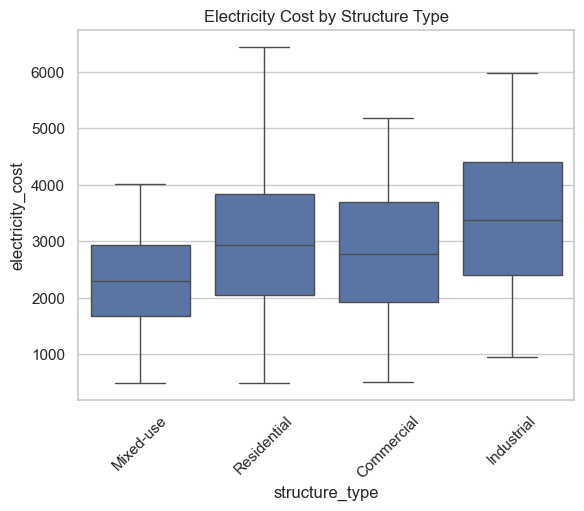

In [21]:
sns.boxplot(x='structure_type', y='electricity_cost', data=df_energy)
plt.title('Electricity Cost by Structure Type')
plt.xticks(rotation=45)
plt.show()

In [43]:
# Clean the 'Gasoline Price (2023 $/gallon)' column
df_gas['Gasoline Price (2023 $/gallon)'] = pd.to_numeric(df_gas['Gasoline Price (2023 $/gallon)'], errors='coerce')


KeyError: 'Gasoline Price (2023 $/gallon)'

In [ ]:
df_gas.dropna(subset=['Gasoline Price (2023 $/gallon)'], inplace=True)


KeyError: ['Gasoline Price (2023 $/gallon)']

In [24]:
for df in [df_fuel, df_energy, df_gas]:
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


In [25]:
# For example, assume the dataset represents years 2000–2024
import numpy as np

df_fuel_cost = df_energy[['electricity_cost']].copy()
df_fuel_cost['year'] = np.linspace(2000, 2024, len(df_fuel_cost)).astype(int)

# Optional: average out duplicate years (if your generated year column repeats)
df_fuel_cost = df_fuel_cost.groupby('year', as_index=False)['electricity_cost'].mean()


ValueError: Unable to parse string "Data Source:" at position 74

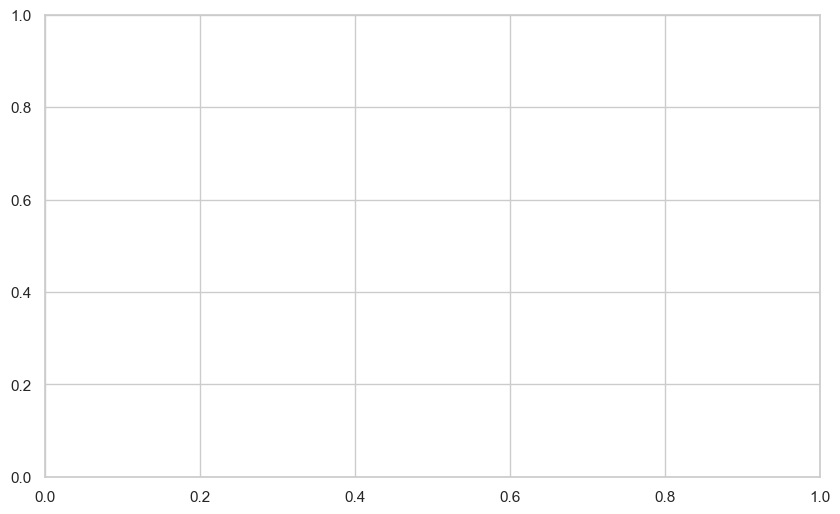

In [26]:
fig, ax1 = plt.subplots(figsize=(10,6))

# Gasoline prices
sns.lineplot(data=df_gas, x='year', y='gasoline_price_(2023_$/gallon)', ax=ax1, color='red', label='Gasoline Price')
ax1.set_ylabel('Gasoline Price ($/gallon)', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Electricity costs
ax2 = ax1.twinx()
sns.lineplot(data=df_fuel_cost, x='year', y='electricity_cost', ax=ax2, color='blue', label='Electricity Cost')
ax2.set_ylabel('Electricity Cost (units)', color='blue')  # Adjust units if you know them
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Electricity vs. Gasoline Cost Over Time')
plt.xlabel('Year')
fig.tight_layout()
plt.show()

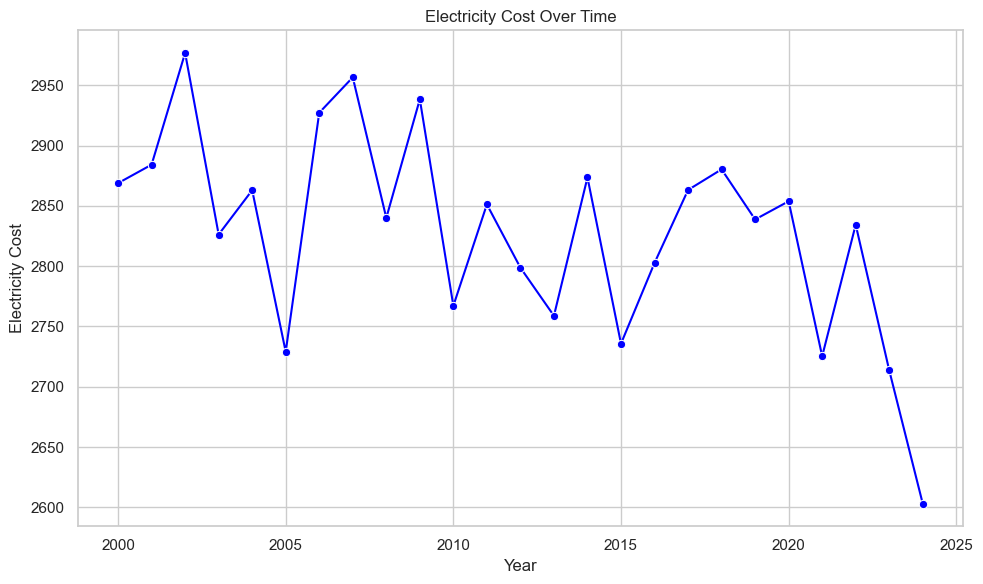

<Axes: xlabel='year', ylabel='rolling_avg'>

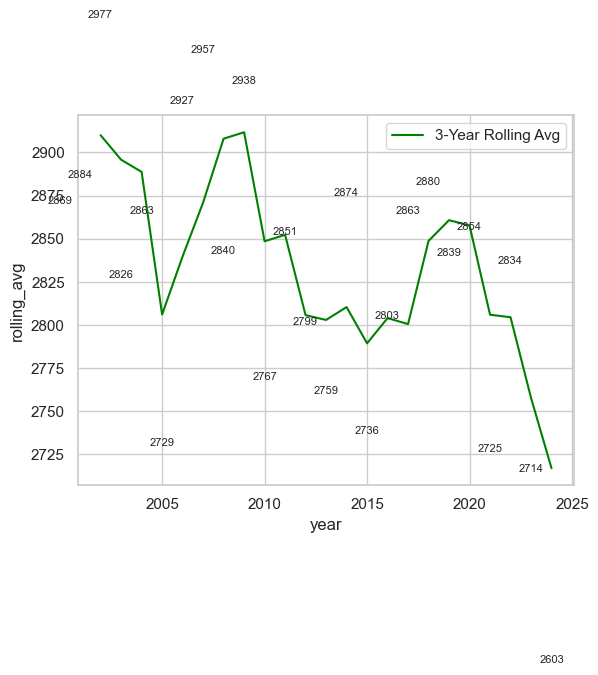

In [27]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_fuel_cost, x='year', y='electricity_cost', color='blue', marker='o')
plt.title('Electricity Cost Over Time')
plt.xlabel('Year')
plt.ylabel('Electricity Cost')
plt.grid(True)
plt.tight_layout()
plt.show()
for x, y in zip(df_fuel_cost['year'], df_fuel_cost['electricity_cost']):
    plt.text(x, y, f'{y:.0f}', ha='center', va='bottom', fontsize=8)

df_fuel_cost['rolling_avg'] = df_fuel_cost['electricity_cost'].rolling(window=3).mean()

sns.lineplot(data=df_fuel_cost, x='year', y='rolling_avg', label='3-Year Rolling Avg', color='green')

ValueError: Unable to parse string "Data Source:" at position 74

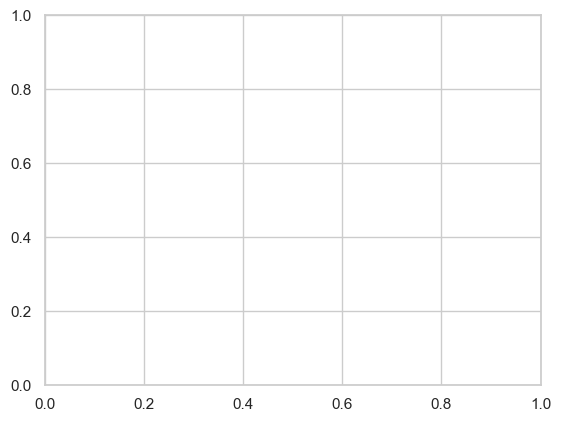

In [28]:
sns.lineplot(data=df_gas, x='year', y='gasoline_price_(2023_$/gallon)', label='Gasoline Price', color='red')

In [29]:
print(df_energy.columns.tolist())

['structure_type', 'electricity_cost', 'water_consumption', 'air_quality_index']


In [30]:
df_energy.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
print(df_energy.columns.tolist())

['structure_type', 'electricity_cost', 'water_consumption', 'air_quality_index']


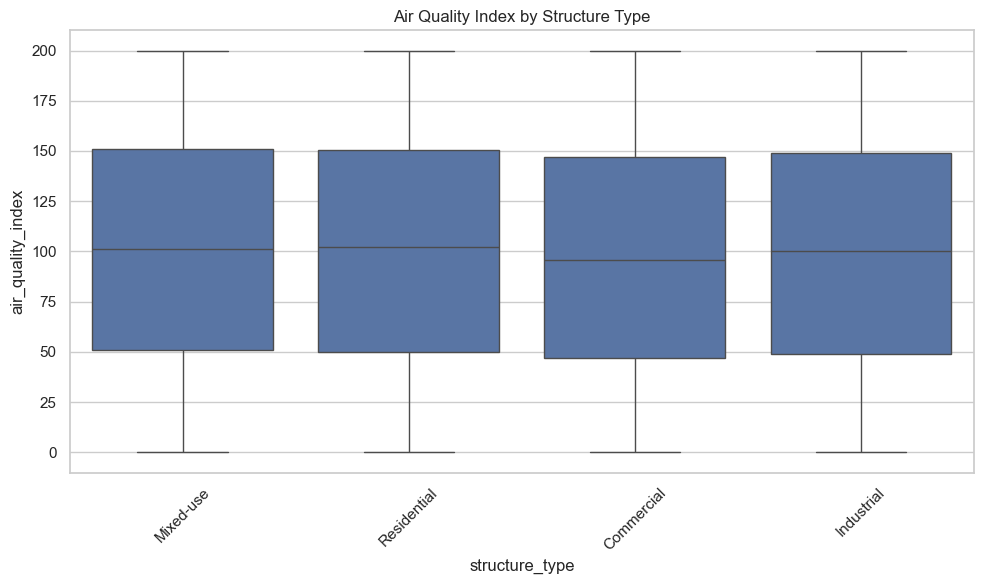

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='structure_type', y='air_quality_index', data=df_energy)
plt.title('Air Quality Index by Structure Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
df_gas_hybrid['Year'] = df_gas_hybrid['Year'].astype(int)
df_gas_hybrid['cmb'] = pd.to_numeric(df_gas_hybrid['cmb'], errors='coerce')

# Drop any missing cmb values
df_gas_hybrid.dropna(subset=['cmb'], inplace=True)

In [36]:
df_mpg_trend = df_gas_hybrid.groupby(['Year', 'Fuel_Type'])['cmb'].mean().reset_index()

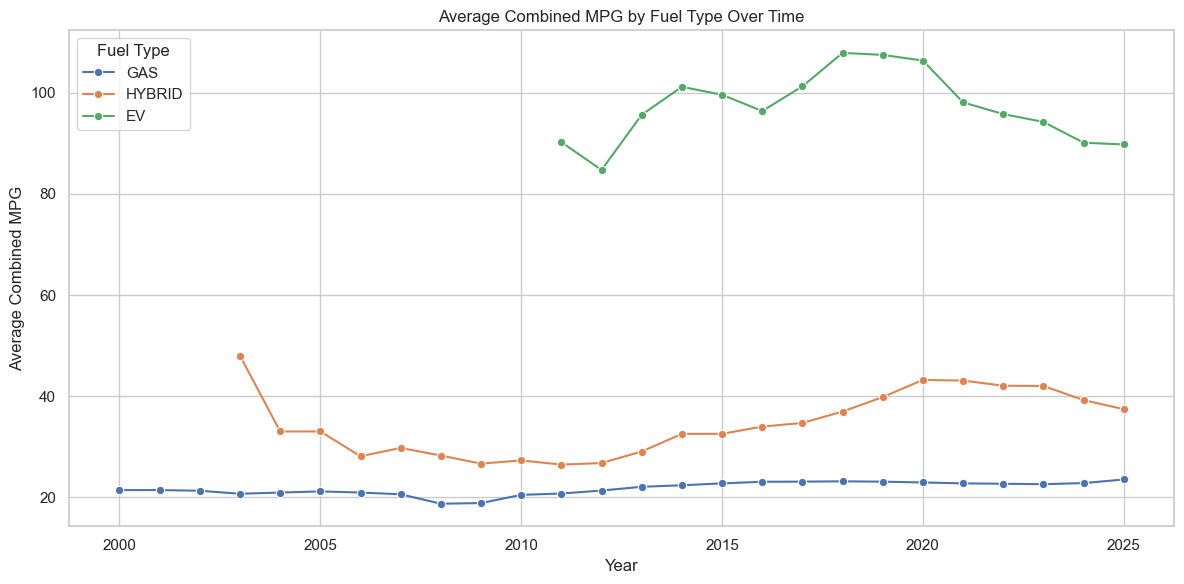

In [37]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_mpg_trend, x='Year', y='cmb', hue='Fuel_Type', marker='o')

plt.title('Average Combined MPG by Fuel Type Over Time')
plt.xlabel('Year')
plt.ylabel('Average Combined MPG')
plt.legend(title='Fuel Type')
plt.grid(True)
plt.tight_layout()
plt.show()

In [38]:
df_combined = pd.concat([df_gas_hybrid, df_ev], ignore_index=True)

In [39]:
df_mpg_comparison = df_combined.groupby(['Year', 'Fuel_Type'])['cmb'].mean().reset_index()

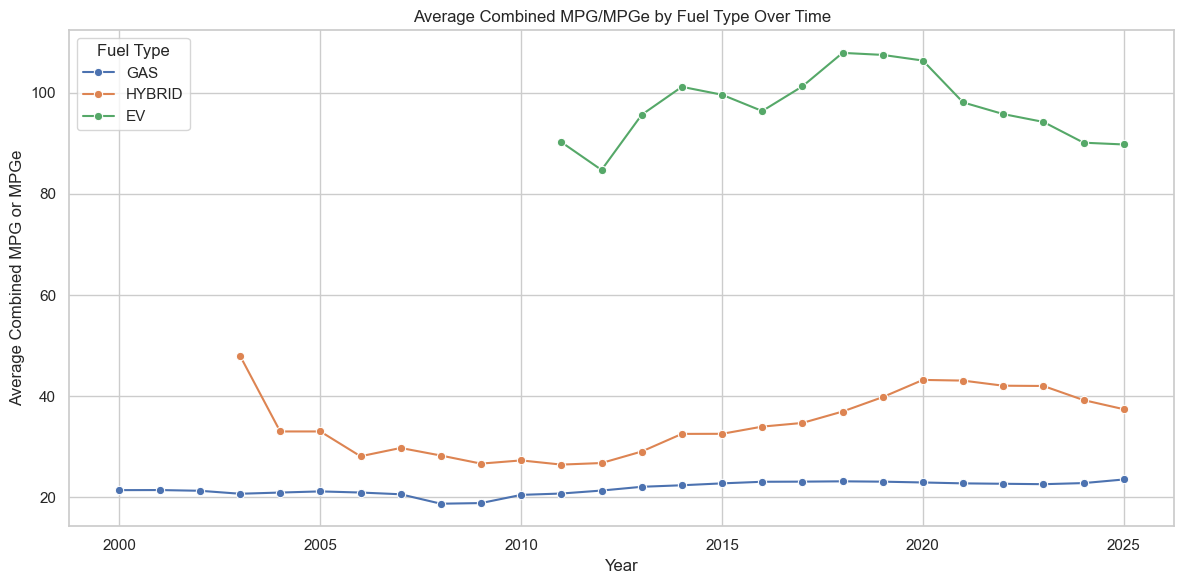

In [40]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_mpg_comparison, x='Year', y='cmb', hue='Fuel_Type', marker='o')

plt.title('Average Combined MPG/MPGe by Fuel Type Over Time')
plt.xlabel('Year')
plt.ylabel('Average Combined MPG or MPGe')
plt.legend(title='Fuel Type')
plt.grid(True)
plt.tight_layout()
plt.show()

In [41]:
df_mpg_trend = df_gas_hybrid.groupby(['Year', 'Fuel_Type'])['cmb'].mean().reset_index()


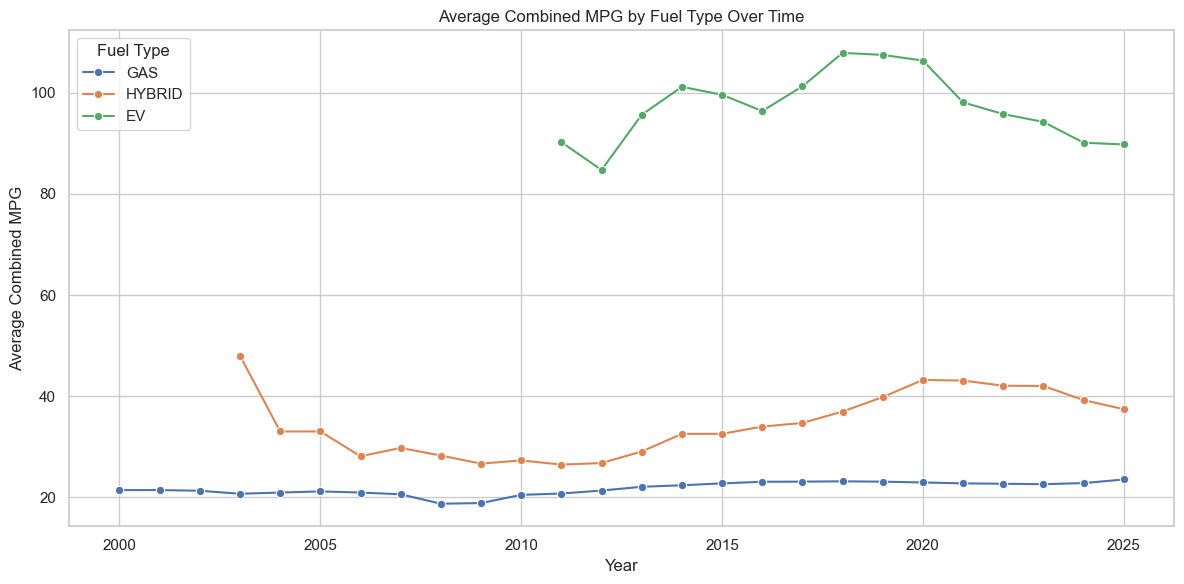

In [42]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_mpg_trend, x='Year', y='cmb', hue='Fuel_Type', marker='o')

plt.title('Average Combined MPG by Fuel Type Over Time')
plt.xlabel('Year')
plt.ylabel('Average Combined MPG')
plt.legend(title='Fuel Type')
plt.grid(True)
plt.tight_layout()
plt.show()
